In [80]:
# 모듈 풀러오기

import tensorflow as tf
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
import seaborn as sns
from tensorflow import keras

sqlite DB에서 데이터 불러오기

In [81]:
con = sqlite3.connect(r"C:\Users\구남이\OneDrive\바탕 화면\활동들\한이음 멘토링\stock.db")
df = pd.read_sql("SELECT * FROM '039490'", con, index_col=None)
df.rename(columns={'index':'date'}, inplace=True)
df = df.set_index('date')
df

,open,high,low,close,volume
date,,,,,
20220517,85000,87600,85000,87600,55677
20220516,86900,87600,85700,85900,55383
20220513,84000,87400,83500,85800,86525
20220512,84700,85300,82700,83200,104007
20220511,87500,87500,85500,85800,108071
...,...,...,...,...,...
20040429,5117,5436,5025,5101,109911
20040428,5071,5452,4995,5444,182604
20040427,5452,5482,5033,5063,299489


In [82]:
df.index = pd.DatetimeIndex(df.index)
df.index

DatetimeIndex(['2022-05-17', '2022-05-16', '2022-05-13', '2022-05-12',
               '2022-05-11', '2022-05-10', '2022-05-09', '2022-05-06',
               '2022-05-04', '2022-05-03',
               ...
               '2004-05-07', '2004-05-06', '2004-05-04', '2004-05-03',
               '2004-04-30', '2004-04-29', '2004-04-28', '2004-04-27',
               '2004-04-26', '2004-04-23'],
              dtype='datetime64[ns]', name='date', length=4471, freq=None)

데이터 정렬

In [83]:
df.sort_index(ascending=True, inplace=True)
df

,open,high,low,close,volume
date,,,,,
2004-04-23,6076,6799,5353,5353,1415109
2004-04-26,5436,5741,5261,5398,343283
2004-04-27,5452,5482,5033,5063,299489
2004-04-28,5071,5452,4995,5444,182604
2004-04-29,5117,5436,5025,5101,109911
...,...,...,...,...,...
2022-05-11,87500,87500,85500,85800,108071
2022-05-12,84700,85300,82700,83200,104007
2022-05-13,84000,87400,83500,85800,86525


데이터 시각화

Text(0, 0.5, 'price')

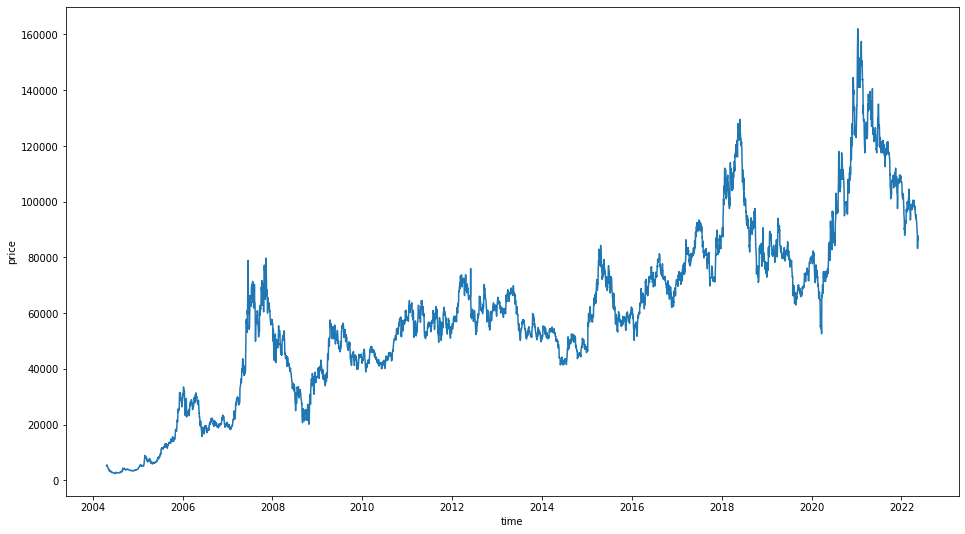

In [84]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['close'], x=df.index)
plt.xlabel('time')
plt.ylabel('price')

데이터 스케일링

In [85]:
from sklearn.preprocessing import MinMaxScaler

# 피처값 스케일링
scaler = MinMaxScaler()
df[['open','high','low','volume']] = scaler.fit_transform(df[['open','high','low','volume']])

# 타켓 스케일링
scaler1 = MinMaxScaler()
df['close'] = scaler1.fit_transform(df['close'].values.reshape(-1,1))

# 스케일링 결과 확인
df


,open,high,low,close,volume
date,,,,,
2004-04-23,0.022741,0.026226,0.019066,0.018324,1.000000
2004-04-26,0.018743,0.019815,0.018467,0.018606,0.241077
2004-04-27,0.018842,0.018245,0.016982,0.016507,0.210068
2004-04-28,0.016462,0.018063,0.016734,0.018894,0.127305
2004-04-29,0.016750,0.017967,0.016930,0.016745,0.075834
...,...,...,...,...,...
2022-05-11,0.531437,0.515237,0.540941,0.522470,0.074531
2022-05-12,0.513944,0.501906,0.522709,0.506176,0.071653
2022-05-13,0.509571,0.514631,0.527918,0.522470,0.059275


딥러닝 학습을 위한 입력데이터(feature column), 정답데이터(label column) 정의 후 numpy로 변환

In [86]:
feature_cols = ["open", "high", "low", "volume"]
label_cols = ["close"]

label_df = pd.DataFrame(df, columns=label_cols)
feature_df = pd.DataFrame(df, columns=feature_cols)

print(feature_df)
print(label_df)

label_np = label_df.to_numpy()
feature_np = feature_df.to_numpy()

                open      high       low    volume
date                                              
2004-04-23  0.022741  0.026226  0.019066  1.000000
2004-04-26  0.018743  0.019815  0.018467  0.241077
2004-04-27  0.018842  0.018245  0.016982  0.210068
2004-04-28  0.016462  0.018063  0.016734  0.127305
2004-04-29  0.016750  0.017967  0.016930  0.075834
...              ...       ...       ...       ...
2022-05-11  0.531437  0.515237  0.540941  0.074531
2022-05-12  0.513944  0.501906  0.522709  0.071653
2022-05-13  0.509571  0.514631  0.527918  0.059275
2022-05-16  0.527689  0.515843  0.542243  0.037224
2022-05-17  0.515819  0.515843  0.537685  0.037433

[4471 rows x 4 columns]
               close
date                
2004-04-23  0.018324
2004-04-26  0.018606
2004-04-27  0.016507
2004-04-28  0.018894
2004-04-29  0.016745
...              ...
2022-05-11  0.522470
2022-05-12  0.506176
2022-05-13  0.522470
2022-05-16  0.523096
2022-05-17  0.533750

[4471 rows x 1 columns]


학습 데이터 X,Y 생성

주가를 나타내는 시계열 데이터에서 윈도우 사이즈는 20, 즉 20개의 시계열 데이터를 이용하여 바로 다음의 close 값을 예측할 예정이다.

make_sequencne_dataset 함수를 이용해서 넘파이로 주어지는 시계열 데이터 feature_np, label_np로 부터 window size에 맞게 GRU 입력 데이터 X, 정답 데이터 Y를 생성한다.

In [87]:
def make_sequene_dataset(feature, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(feature)-window_size):
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
    return np.array(feature_list), np.array(label_list)

In [88]:
window_size = 20
X,Y = make_sequene_dataset(feature_np, label_np, window_size)
print(X.shape, Y.shape)

(4451, 20, 4) (4451, 1)


X.shape은 (batch size, time steps, input dims) 형상을 가지는 3차원 텐서인 것을 알 수 있다. 

트레이닝 데이터 / 테스트 데이터 분리

In [89]:
split = int(X.shape[0] * 0.8)

X_train = X[0:split, :]
y_train = Y[0:split]

X_test = X[split:]
y_test = Y[split:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3560, 20, 4) (3560, 1)
(891, 20, 4) (891, 1)


GRU 모델 구축

256개의 노드를 가지는 GRU레이어와 1개의 노드를 가지는 출력층으로 구성된 모델이 구축됨

In [90]:
model = Sequential()

model.add(GRU(256, activation='tanh', input_shape = X_train[0].shape))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 256)               201216    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 201,473
Trainable params: 201,473
Non-trainable params: 0
_________________________________________________________________


model 컴파일 및 학습

손실함수 loss=mse, 옵티마이저는 Adam, 관찰대상인 metric은 오차의 절대값을 나타내는 ame로 설정하고 earlystopping 조건하에서 100번을 반복하여 학습을 진행

In [91]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, callbacks=[early_stop])

Epoch 1/50
223/223 [==============================] - 21s 56ms/step - loss: 0.0010 - mae: 0.0166 - val_loss: 4.2933e-04 - val_mae: 0.0150
Epoch 2/50
223/223 [==============================] - 10s 44ms/step - loss: 1.8723e-04 - mae: 0.0097 - val_loss: 5.3379e-04 - val_mae: 0.0171
Epoch 3/50
223/223 [==============================] - 9s 40ms/step - loss: 1.6479e-04 - mae: 0.0089 - val_loss: 3.6231e-04 - val_mae: 0.0139
Epoch 4/50
223/223 [==============================] - 9s 40ms/step - loss: 1.6636e-04 - mae: 0.0092 - val_loss: 4.1614e-04 - val_mae: 0.0159
Epoch 5/50
223/223 [==============================] - 9s 41ms/step - loss: 1.6668e-04 - mae: 0.0093 - val_loss: 3.2469e-04 - val_mae: 0.0130
Epoch 6/50
223/223 [==============================] - 9s 41ms/step - loss: 1.5491e-04 - mae: 0.0088 - val_loss: 4.7642e-04 - val_mae: 0.0164
Epoch 7/50
223/223 [==============================] - 9s 40ms/step - loss: 1.4957e-04 - mae: 0.0087 - val_loss: 4.9282e-04 - val_mae: 0.0183
Epoch 8/50
223/

test_data를 활용하여 예측

In [92]:
pred = model.predict(X_test)

test_data를 활용하여 예측

In [93]:
print(pred.shape)
print(y_test.shape)

(891, 1)
(891, 1)


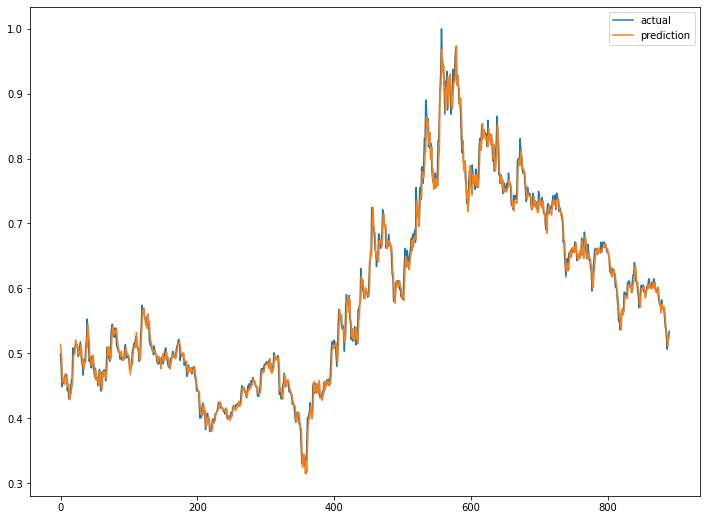

In [94]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test), label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

스케일링 전 값으로 역변환

In [95]:
rescaled_y_test = scaler1.inverse_transform(np.array(y_test).reshape(-1, 1))
rescaled_pred = scaler1.inverse_transform(np.array(pred).reshape(-1,1))

MSE 계산

In [96]:
MSE = np.square(np.subtract(rescaled_y_test, rescaled_pred)).mean()
MSE

6757463.214939995

RMSE 계산

In [97]:
import math
rmse = math.sqrt(MSE)
rmse

2599.5121109431275

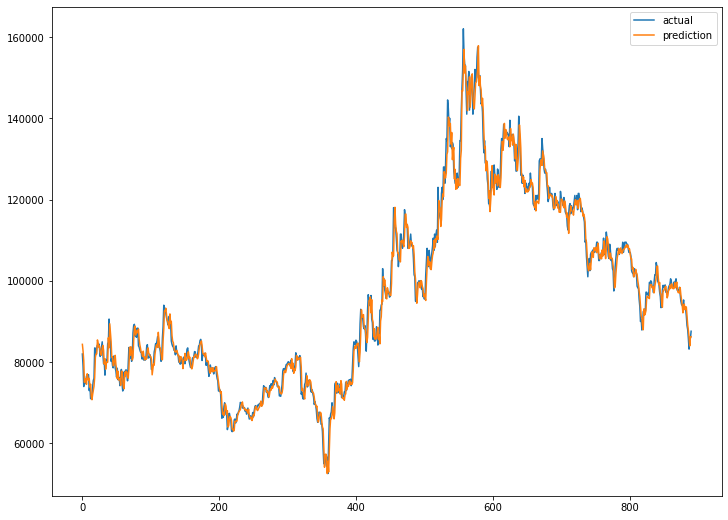

In [98]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(rescaled_y_test), label='actual')
plt.plot(rescaled_pred, label='prediction')
plt.legend()
plt.show()